
Matriz de confusión

Cuando VP, FP, VN, FN se recopilan en una tabla, se denomina matriz de confusión.
La matriz se forma de la siguiente manera:

- las etiquetas del algoritmo (0 y 1) se colocan en el eje horizontal ("Predicciones");
- las etiquetas verdaderas de la clase (0 y 1) se colocan en el eje vertical ("Respuestas").

Lo que obtienes:

1. Las predicciones correctas están en la diagonal principal (desde la esquina superior izquierda):
- VN en la esquina superior izquierda
- VP en la esquina inferior derecha

2. Las predicciones incorrectas están fuera de la diagonal principal:
 
- FP en la esquina superior derecha
- FN en la esquina inferior izquierda

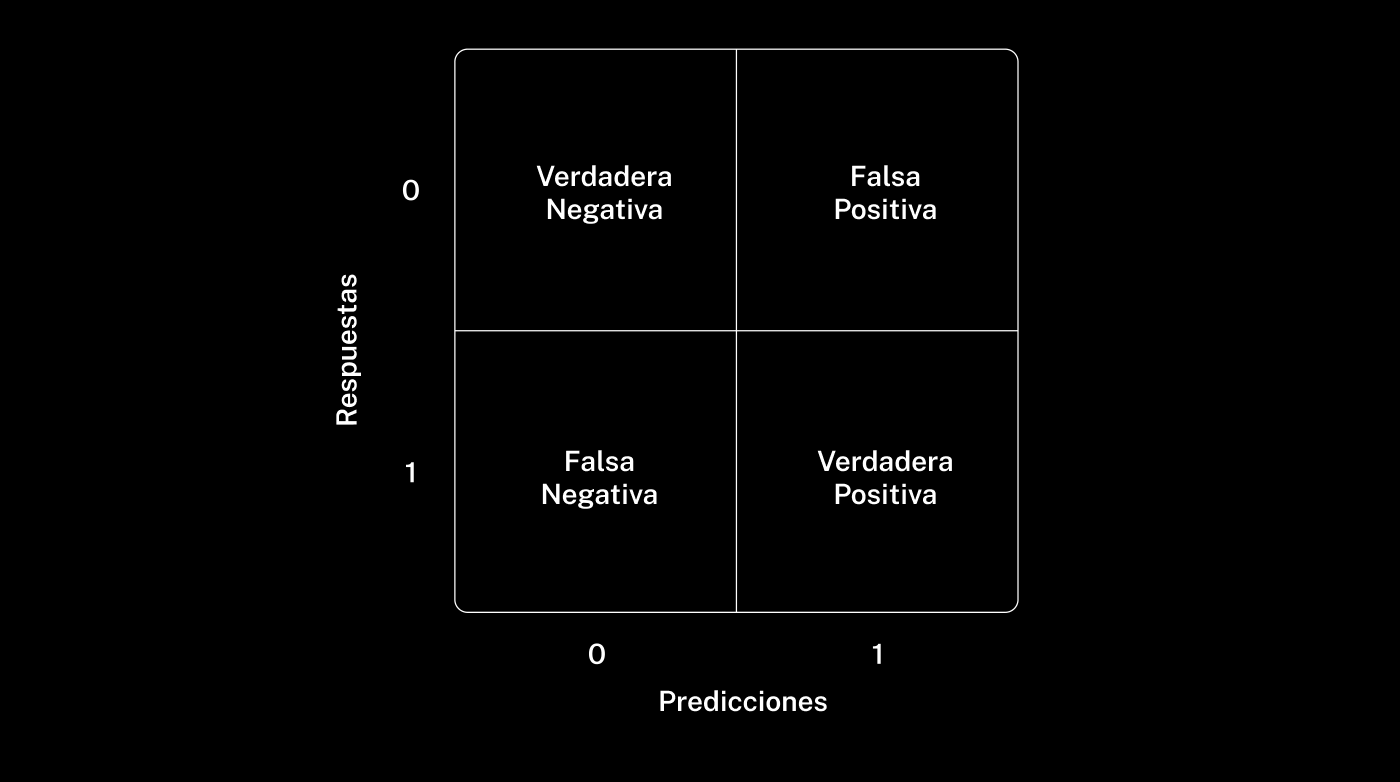


La matriz de confusión te permite visualizar los resultados de calcular las métricas de exactitud y recall.

La matriz de confusión se encuentra en el módulo sklearn.metrics, que ya conoces. La función confusion_matrix() toma respuestas y predicciones correctas y devuelve una matriz de confusión.

1. Calcula la matriz de confusión utilizando la función confusion_matrix().  Impórtala desde el módulo sklearn.metrics. Muestra los resultados en la pantalla.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix # < escribe el código aquí  >

target = pd.Series([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])
predictions = pd.Series([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

# < escribe el código aquí  >
print(confusion_matrix(target, predictions))

[[4 3]
 [2 5]]


¡La matriz de confusión es el hogar perfecto para Verdadero Positivo, Falso Negativo, Falso Positivo y Verdadero Negativo!

2. Calcula una matriz de confusión para el árbol de decisión y llama a la función confusion_matrix(). Muéstrala en pantalla. Muéstrala en pantalla.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

data = pd.read_csv('/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

# < escribe el código aquí  >
print(confusion_matrix(target_valid, predicted_valid))

#[[12331   165]
# [  157    12]]

¡Es correcto!

El modelo es bastante pesimista. A menudo ve respuestas negativas donde no debería.¿Esto te recuerda a alguien?

Recall

La matriz de confusión te ayudará a crear nuevas métricas. Comencemos con recall.
Recall revela la porción de respuestas positivas identificadas por el modelo o la proporción de respuestas positivas marcadas como positivas por el modelo (VP) frente a las respuestas positivas marcadas como positivas por el modelo (VP) más las respuestas marcadas como negativas por el modelo que en realidad son positivas (FN). Estas respuestas positivas son valiosas, por lo que es importante saber con qué eficacia las encuentra el modelo.

Recall se calcula usando esta fórmula:

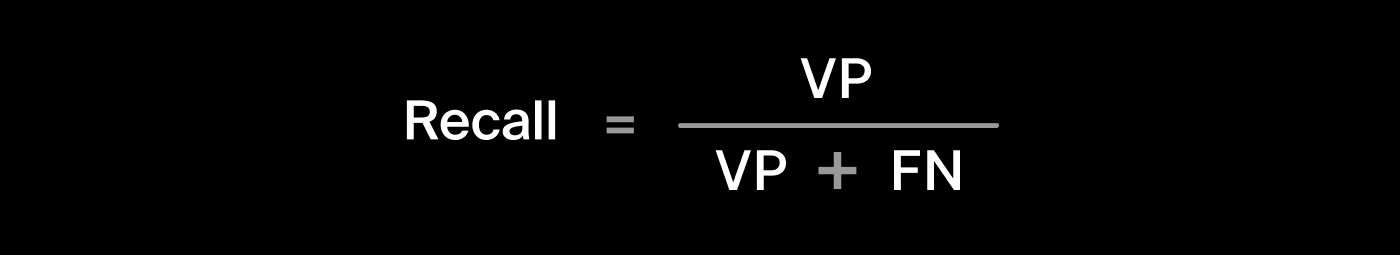

Veamos un ejemplo:

100 personas aseguradas hicieron reclamaciones. Este es el número de todas las observaciones positivas o VP + FN,
El modelo identificó correctamente solo 20
entonces, recall es 0.2.
Recall es la proporción de VP entre todas las respuestas que tienen una etiqueta verdadera de 1. Queremos que el valor de recall esté cerca de 1. Esto significaría que el modelo es bueno para identificar verdaderos positivos. Si está más cerca de cero, el modelo necesita ser revisado y arreglado.

Ejercicio

En el módulo sklearn.metrics, encuentra la función que se encarga de calcular recall. Impórtala.

La función toma respuestas y predicciones correctas y devuelve la proporción de respuestas correctas encontradas por el modelo. Muestra los resultados en la pantalla.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

# < escribe el código aquí  >

recall = recall_score(target_valid, predicted_valid)

print(recall)

#0.07100591715976332

¡Es correcto!

¡Qué fracaso! El valor de recall no se acerca a 1. ¡Tal vez la métrica de precisión pueda ayudar!

Precisión

Otra métrica para evaluar la calidad de una predicción de clase objetivo es la precisión.
La precisión mide la relación entre las predicciones verdaderas positivas y todas las predicciones positivas realizadas por el modelo. Por lo tanto, cuantas más predicciones de falsos positivos se hagan, menor será la precisión.

La precisión se calcula usando esta fórmula:

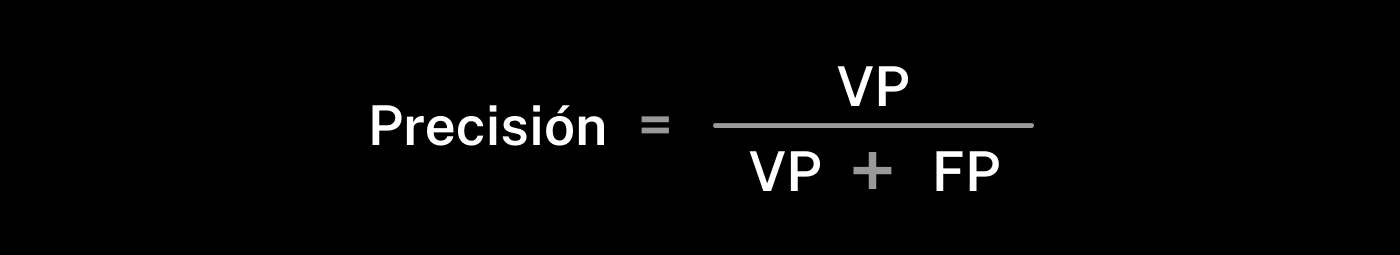

Veamos un ejemplo:

- Según la predicción del modelo, 100 personas aseguradas solicitarán una indemnización. Este es el número de todas las observaciones que el modelo ha etiquetado como positivas, o VP + FP

- 20 de ellas realmente solicitaron un pago de seguro (este es el número de VP);
la precisión es 0.2.

Recuerda que VP representa respuestas verdaderas positivas. FP representa respuestas positivas marcadas por el modelo. Necesitamos que la precisión esté cerca de uno.



En el módulo sklearn.metrics, encuentra la función que calcula la precisión. Impórtala.

Esta función toma respuestas y predicciones correctas. Devuelve observaciones marcadas como positivas por el modelo que en realidad son positivas. Muestra los resultados en la pantalla.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

# < escribe el código aquí >
print(precision_score(target_valid, predicted_valid))

#0.06779661016949153

Es correcto!

La métrica de precisión tampoco nos dio lo que queríamos. ¡Nos estamos quedando sin opciones!

Explicación rápida:

precision_score() es la función correcta de sklearn.metrics para calcular la precisión (precision) de un modelo.

Esta métrica responde a la pregunta:

“¿De todas las observaciones que el modelo predijo como clase positiva (1), cuántas eran realmente positivas?”

Es útil especialmente en problemas con clases desbalanceadas, como detección de fraude, donde los falsos positivos son importantesn


Recall vs. Precisión

Cuando el modelo predice mal las clases positivas, tanto la recall como la precisión son bajas. ¿Podemos mejorar sus valores?

Veamos de nuevo las fórmulas para calcular recall y precisión:

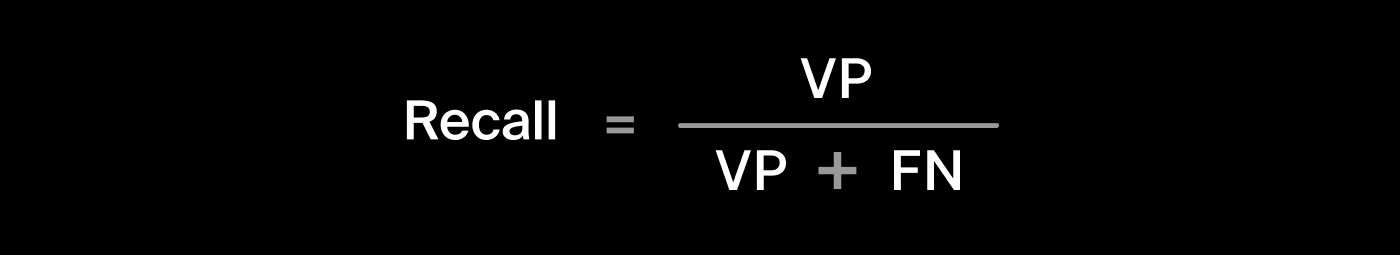


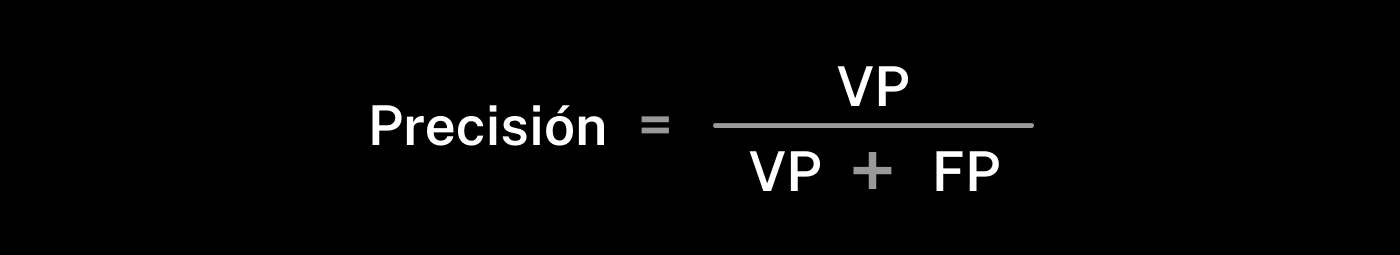

Pregunta

Si recall es la métrica clave en la pregunta anterior, ¿cómo puedes hacer que sea lo más alta posible?

Respuesta:

Entrena un modelo que prediga "1" para todas las observaciones. Recall será igual a 1.0
¡Correcto! Si el modelo predice "1" para todas las observaciones, el valor de FN será 0, lo que dejará solo VP en el denominador de la fórmula, por lo que recall será 1 (VP/VP).

¡Ya descubrimos cómo maximizar la métrica de recall! La fórmula tiene en cuenta solo el error de la clase positiva, pero ignora la clase negativa. Debes entrenar un modelo que responda "1" con la menor frecuencia posible. Pero responder siempre "0" no ayudará, porque entonces dividirás cero entre cero en la fórmula.